<h1>EDA QUALITATIVE</h1>

<h3>Plan: </h3>
<ol>
    <li>Analyse Univarié</li>
    <ul>
        <li>Nombre de modalités pour chaque variable</li>
        <li>Repartition des modalités pour chaque variable</li>
    </ul>
    <li>Les Valeurs manquantes</li>
    <li>Analyse Bivarié</li>
    <ul>
        <li>Discretisation du label</li>
        <li>Indépendance entre les features et label</li>
    </ul>
    <li>Autre traitement</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/data_v2.csv',sep=';')

In [3]:
df.head()

,Bathrooms,Bedrooms,Erf_size,Floor_size,Garages,Listing_date,Listing_number,Pet_friendly,Price,Town,...,No_pets_allowed,Furnished,Flatlet,Fibre_internet,Furnished_optional,ADSL_internet,Satellite_internet,Fixed_wimax_internet,month,year
0,3.0,3.0,304.0,326.0,2.0,2020-07-10,108859219,1.0,6480000.0,"Tokai, Cape Town",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2020
1,3.0,3.0,430.5,140.0,2.0,2020-09-23,109153971,1.0,6250000.0,"14 Graham Road, Sea Point, Cape Town",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2020
2,3.5,4.0,659.0,300.0,2.0,2020-09-23,109154367,0.0,13950000.0,"Camps Bay, Cape Town",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2020
3,1.0,2.0,430.5,92.0,1.0,2020-09-23,109154455,0.0,1050000.0,"Ottery, Cape Town",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2020
4,1.0,1.0,430.5,61.0,1.0,2020-07-23,108907258,0.0,1265000.0,"Muizenberg, Cape Town",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2020


<h2>1) Analyse Univarié</h2>

<p>On va traiter les variables 'Town' et Type_of_property' dans cette analyse</p>

<ul><li><h4>Nombre de modalités pour chaque variable</h4></li></ul>

In [6]:
def getCountModalite(data,list_feature):
    head           = ['Feature','Count of level']
    feature_all    = []
    count_modalite = []
    
    for feature in list_feature : 
        feature_all.append(feature)
        count_modalite.append(len(pd.unique(data[feature])))
        
    resultDf                   = pd.DataFrame(columns=head)
    resultDf['Feature']        = feature_all
    resultDf['Count of level'] = count_modalite
    resultDf.set_index(['Feature'], inplace=True)
    return resultDf

In [7]:
variable_qualitative_liste = list(['Town', 'Type_of_property'])
getCountModalite(df,variable_qualitative_liste)

,Count of level
Feature,
Town,2750
Type_of_property,4


<strong>Constatation: </strong> Pour 'Town', on a 2750 modalités (c'est beaucoup), donc on va extraire le nom du district.
<p>On va créer une variable <strong>District </strong></p>

In [8]:
df['Town']

0                                 Tokai, Cape Town
1             14 Graham Road, Sea Point, Cape Town
2                             Camps Bay, Cape Town
3                                Ottery, Cape Town
4                            Muizenberg, Cape Town
                           ...                    
7591                            Wynberg, Cape Town
7592                        Grassy Park, Cape Town
7593              Cape Town City Centre, Cape Town
7594        19 Coventry Road, Woodstock, Cape Town
7595    36 Oliehout Street, Bonteheuwel, Cape Town
Name: Town, Length: 7596, dtype: object

In [9]:
df['District'] = df['Town']
for i in range(df.shape[0]):
    x             = df['Town'].iloc[i]
    town_splitted = x.split(',')
    if town_splitted :
        df['District'].iloc[i] =  town_splitted[-2].strip() 

In [10]:
variable_qualitative_liste = list(['Type_of_property','District'])

In [11]:
getCountModalite(df,variable_qualitative_liste)

,Count of level
Feature,
Type_of_property,4
District,144


<ul><li><h4>Repartition des modalités pour chaque variable</h4></li></ul>

In [12]:
def processPerLevels(data,list_feature):
    catHead     = ['Feature', 'Level', 'Count', 'Frequence %']
    count       = []
    freq        = []
    feature_all = []
    list_level_all = []
    
    for feature in list_feature:
        list_level = data[feature].unique().tolist()
        len_level  = len(list_level)
        for level in list_level:
            count_level = len(data.loc[data[feature] == level])
            count.append(count_level)
            freq_level  = count_level * 100/len(data)
            freq.append(round(freq_level, 2))
            feature_all.append(feature)
            list_level_all.append(level)
    
    resultDf                = pd.DataFrame(columns=catHead)
    resultDf['Level']       = list_level_all
    resultDf['Feature']     = feature_all
    resultDf['Count']       = count
    resultDf['Frequence %'] = freq
    resultDf.set_index(['Feature', 'Level'], inplace=True)
    return resultDf

In [13]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,variable_qualitative_liste)
proportion_modalite

Count  Frequence %
Feature          Level                                         
Type_of_property House                        2934        38.63
                 Townhouse                     278         3.66
                 Apartment / Flat             4381        57.68
                 NaN                             0         0.00
District         Tokai                          69         0.91
                 Sea Point                     737         9.70
                 Camps Bay                     274         3.61
                 Ottery                         38         0.50
                 Muizenberg                    159         2.09
                 Oranjezicht                   128         1.69
                 Waterfront                     66         0.87
                 Vredehoek                     152         2.00
                 Cape Town City Centre         650         8.56
                 Pinelands                     144         1.90
                 Kenilworth Upper              130         1.71
                 Thornton                       40         0.53
                 Gardens                       193         2.54
                 Harfield Village               22         0.29
                 Parkwood                        1         0.01
                 Bantry Bay                    109         1.43
                 Kenilworth                    136         1.79
                 Diep River                     70         0.92
                 Langa                           2         0.03
                 Wynberg Upper                 115         1.51
                 Observatory                   248         3.26
                 Retreat                        26         0.34
                 Lakeside                       37         0.49
                 Rondebosch                    258         3.40
                 Green Point                   345         4.54
                 Claremont Upper               238         3.13
                 Southfield                     20         0.26
                 Tamboerskloof                  78         1.03
                 Mountview                       3         0.04
                 Charlesville                    4         0.05
                 Newlands                      165         2.17
                 Kenwyn                         14         0.18
                 Woodstock                     293         3.86
                 Foreshore                     105         1.38
                 St James                       17         0.22
                 De Waterkant                  180         2.37
                 Fresnaye                      154         2.03
                 Steenberg Golf Estate          17         0.22
                 Walmer Estate                  30         0.39
                 Constantia                    280         3.69
                 Plumstead                     143         1.88
                 Llandudno                      44         0.58
                 Silvertree Estate              13         0.17
                 Clifton                        41         0.54
                 Rosebank                       60         0.79
                 Meadowridge                    15         0.20
                 Salt River                     57         0.75
                 Kirstenhof                     39         0.51
                 Mouille Point                 126         1.66
                 Silverhurst Estate              1         0.01
                 Claremont                     174         2.29
                 Three Anchor Bay               57         0.75
                 Zonnebloem                    117         1.54
                 Bergvliet                      40         0.53
                 Rondebosch East                20         0.26
                 Belhar                         28         0.37
                 Penlyn Estate                   7         0.09
             

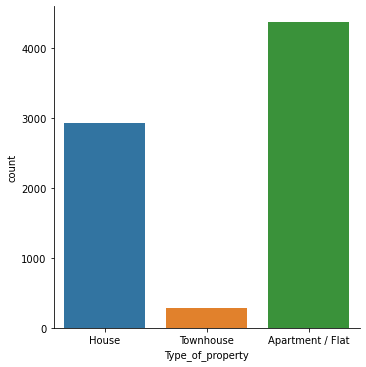

In [14]:
sns.catplot(x="Type_of_property", kind="count", data=df)

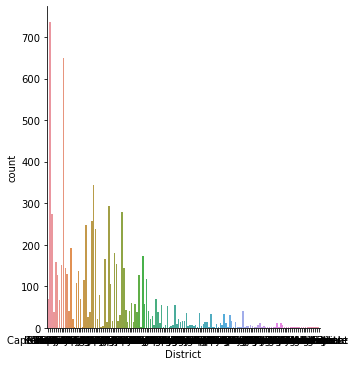

In [15]:
sns.catplot(x="District", kind="count", data=df)

<p><strong>Constat:</strong></p>
<p> - Mode pour la variable <b>District : Sea Point</b>(9.58%)</p>
<p> - Mode pour la variable <b>Type_of_property : Apartment/Flat</b>(58.32%)</p>

<h2>2) Les Valeurs manquantes</h2>

In [16]:
def get_missing_value(df,variable_quantitative):
    tab   = pd.DataFrame(columns=["feature","count","frequence(%)"])
    count    = []
    freq     = []
    features = []
    
    for feature in variable_quantitative:
        count.append(df[feature].isnull().sum())
        freq.append(round(df[feature].isnull().sum()*100/df.shape[0],2))
        features.append(feature)
        
    tab["count"]        = count
    tab["frequence(%)"] = freq
    tab["feature"]      = features

    return tab

In [17]:
get_missing_value(df,variable_qualitative_liste)

,feature,count,frequence(%)
0,Type_of_property,3,0.04
1,District,0,0.00


<p>La variable : Type_of_property a un pourcentage de valeur manquante très faible.On va le supprimer</p>

In [18]:
df = df.dropna(subset = ["Type_of_property"],axis=0) 

In [19]:
get_missing_value(df,variable_qualitative_liste)

,feature,count,frequence(%)
0,Type_of_property,0,0.0
1,District,0,0.0


<h2>3) Analyse Bivarié</h2>

<ul><li><h4>Discretisation du label</h4></li></ul>

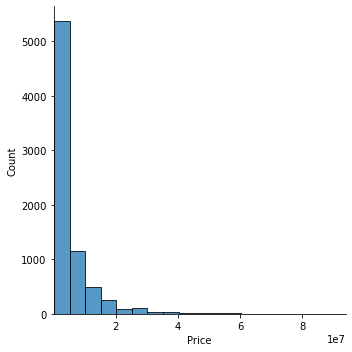

In [20]:
sns.displot(df, x="Price",binwidth= 5000000)
plt.xlim(390, 94000000)
df["Price_bins"] = pd.cut(x=df['Price'], bins=[0, 10000000, 20000000, 30000000, 40000000, 50000000,60000000,70000000,80000000,90000000,100000000])

<ul><li><h4>Indépendance entre les features et label </h4></li></ul>

In [21]:
def test_indepedance(data,list_categorical_feature1,list_categorical_feature2,option = True):
    '''
        data                     : dataframe donné
        list_categorical_feature1 : liste des variables catégoriques 1
        list_categorical_feature2 : liste des variables catégoriques 2
        option                   : true si on veut voir la dependance
        
    '''
    list_dict ={}
    for var1 in list_categorical_feature1:
        list_var_dependant = []
        for var2 in list_categorical_feature2:
            obs = pd.crosstab( df[var1],  df[var2])
            chi2, p, dof, ex = chi2_contingency(obs, correction=False)
            if option == True:
                if((p < 0.05) and (var1!=var2)):
                    list_var_dependant.append(var2)
            else:
                if((p >= 0.05) and (var1!=var2)):
                    list_var_dependant.append(var2)
        list_dict[var1] = list_var_dependant
        print(f'{var1:<50}{list_var_dependant}')

In [22]:
variable_qualitative_liste = list(['Type_of_property','District','Price_bins'])
test_indepedance(df,variable_qualitative_liste,variable_qualitative_liste,option = True)

Type_of_property                                  ['District', 'Price_bins']
District                                          ['Type_of_property', 'Price_bins']
Price_bins                                        ['Type_of_property', 'District']


<strong>Constat:</strong> Tous les variables sont dépendants 2 à 2

<h2>4) Autre traitement </h2>

<p>Puisque 144 modalités pour District sont encore nombreuses,on va créer une modalite "others" pour rassembler les modalité qui on un effectif inférieur à 10 </p>

In [23]:
df['District'] = df['District'].apply(lambda x: 'others' if x in df['District'].value_counts(ascending=False)[df['District'].value_counts(ascending=False)<=10] else x) # Replace all 'Town_Distric' less than 10 by 'other'

In [25]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,variable_qualitative_liste)
proportion_modalite

Count  Frequence %
Feature          Level                                         
Type_of_property House                        2934        38.64
                 Townhouse                     278         3.66
                 Apartment / Flat             4381        57.70
District         Tokai                          69         0.91
                 Sea Point                     737         9.71
                 Camps Bay                     274         3.61
                 Ottery                         38         0.50
                 Muizenberg                    159         2.09
                 Oranjezicht                   128         1.69
                 Waterfront                     66         0.87
                 Vredehoek                     152         2.00
                 Cape Town City Centre         650         8.56
                 Pinelands                     144         1.90
                 Kenilworth Upper              130         1.71
                 Thornton                       40         0.53
                 Gardens                       193         2.54
                 Harfield Village               22         0.29
                 others                        211         2.78
                 Bantry Bay                    109         1.44
                 Kenilworth                    136         1.79
                 Diep River                     70         0.92
                 Wynberg Upper                 115         1.51
                 Observatory                   248         3.27
                 Retreat                        26         0.34
                 Lakeside                       37         0.49
                 Rondebosch                    258         3.40
                 Green Point                   345         4.54
                 Claremont Upper               238         3.13
                 Southfield                     20         0.26
                 Tamboerskloof                  78         1.03
                 Newlands                      165         2.17
                 Kenwyn                         14         0.18
                 Woodstock                     293         3.86
                 Foreshore                     105         1.38
                 St James                       17         0.22
                 De Waterkant                  180         2.37
                 Fresnaye                      154         2.03
                 Steenberg Golf Estate          17         0.22
                 Walmer Estate                  30         0.40
                 Constantia                    280         3.69
                 Plumstead                     143         1.88
                 Llandudno                      44         0.58
                 Silvertree Estate              13         0.17
                 Clifton                        41         0.54
                 Rosebank                       60         0.79
                 Meadowridge                    15         0.20
                 Salt River                     57         0.75
                 Kirstenhof                     39         0.51
                 Mouille Point                 126         1.66
                 Claremont                     174         2.29
                 Three Anchor Bay               57         0.75
                 Zonnebloem                    117         1.54
                 Bergvliet                      40         0.53
                 Rondebosch East                20         0.26
                 Belhar                         28         0.37
                 Wynberg                        70         0.92
                 Stonehurst Mountain Estate     37         0.49
                 Kensington                     12         0.16
                 Marina Da Gama                 55         0.72
                 Mowbray                        52         0.68
                 Maitland                       54         0.71
             

In [26]:
df['District'].value_counts(ascending=False)

Sea Point                     737
Cape Town City Centre         650
Green Point                   345
Woodstock                     293
Constantia                    280
Camps Bay                     274
Rondebosch                    258
Observatory                   248
Claremont Upper               238
others                        211
Gardens                       193
De Waterkant                  180
Claremont                     174
Newlands                      165
Muizenberg                    159
Fresnaye                      154
Vredehoek                     152
Pinelands                     144
Plumstead                     143
Kenilworth                    136
Kenilworth Upper              130
Oranjezicht                   128
Mouille Point                 126
Zonnebloem                    117
Wynberg Upper                 115
Bantry Bay                    109
Foreshore                     105
Tamboerskloof                  78
Diep River                     70
Wynberg       

<h2>5) Export des résultats</h2>

In [27]:
df.to_csv("../data/data_v3.csv",sep=";",index=False)